In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timezone

In [2]:
url="http://192.168.35.69/conex2tplink.txt"
df = pd.read_csv(url, sep='\t')
df = df.dropna()
df['momento'] = (pd.to_datetime(df['timestamp'], unit='s')- pd.Timedelta('04:30:00')).apply(lambda x: x.strftime("%d/%m/%Y %H:%M"))
df['momento'] = pd.to_datetime(df['momento'], format="%d/%m/%Y %H:%M")
print(df.shape)
df.tail()

(7617, 5)


,timestamp,N_conx,b_reci,b_env,momento
7613,1.612618e+09,19,48937959,112687649,2021-02-06 09:02:00
7614,1.612618e+09,18,49934897,114238313,2021-02-06 09:03:00
7615,1.612618e+09,18,51342500,115988875,2021-02-06 09:04:00
7616,1.612619e+09,16,52032248,117573657,2021-02-06 09:05:00
7617,1.612619e+09,16,52730147,119168076,2021-02-06 09:06:00


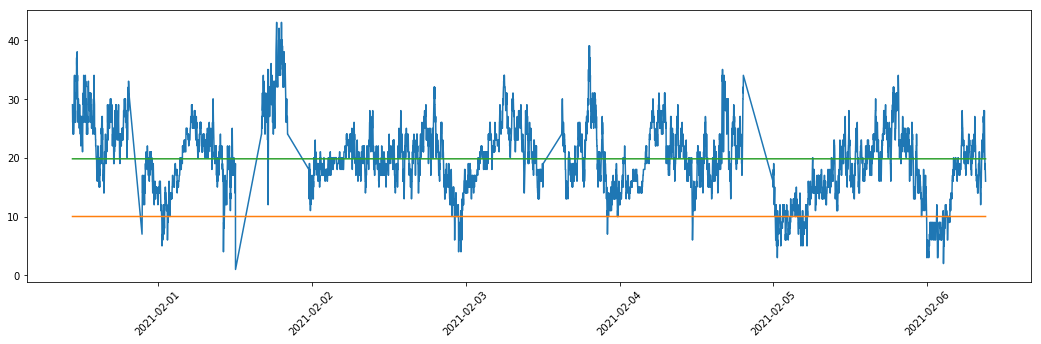

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib import rcParams
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 18, 5
X = list(df.momento.values)
Y = list(df.N_conx.values)
Z = [10]*len(Y)
Z1 = [df.N_conx.mean()]*len(Y)

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(X)//8))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(len(X)//4))

plt.plot(X, Y)
plt.plot(X,Z)
plt.plot(X,Z1)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation= 45)
plt.show()



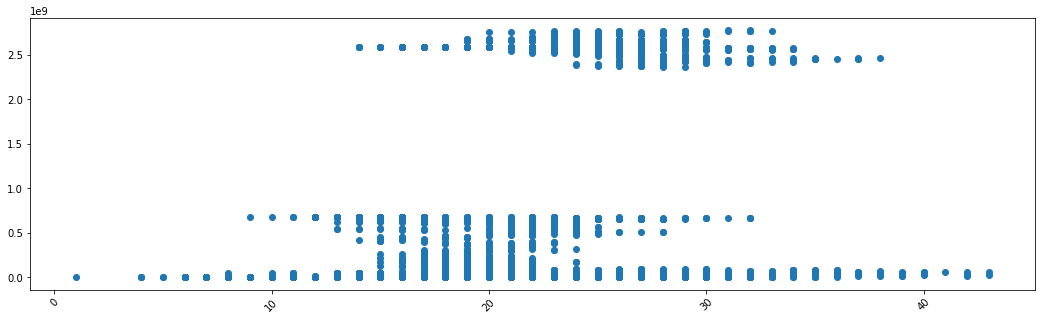

In [14]:
X = list(df.N_conx.values)
Y = list(df.b_reci.values)
#Z = list(df.b_env.values)
#Z1 = [df.N_conx.mean()]*len(Y)

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(X)//8))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(len(X)//4))

plt.scatter(X, Y)
#plt.plot(X,Z)
#plt.yscale('log')

#plt.plot(X,Z1)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation= 45)
plt.show()